<a href="https://colab.research.google.com/github/SURESHASWATHI/Excelr_assignment/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the glass dataset using Random Forest, Bagging, and Boosting methods. Perform EDA, data visualization, and preprocessing. Explain Bagging and Boosting and how to handle data imbalance. Compare the performance of the three models.

## Load the dataset

### Subtask:
Load the glass dataset into a pandas DataFrame.


**Reasoning**:
Import pandas, read the Excel file into a DataFrame, and display the head and info to understand the data.



In [1]:
import pandas as pd

df = pd.read_excel('/content/glass.xlsx')
display(df.head())
display(df.info())

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Prepare a model for glass classification using Random Forest  18 non-null     object
dtypes: object(1)
memory usage: 284.0+ bytes


None

**Reasoning**:
The previous step loaded the data description instead of the actual data. Need to re-load the data, specifying the correct sheet and header row based on typical Excel file structures.



In [3]:
excel_file = pd.ExcelFile('/content/glass.xlsx')
print(excel_file.sheet_names)

['Description', 'glass']


**Reasoning**:
The available sheets are 'Description' and 'glass'. The data is likely in the 'glass' sheet. Load the data from the 'glass' sheet and display the head and info.



In [4]:
df = pd.read_excel('/content/glass.xlsx', sheet_name='glass', header=0)
display(df.head())
display(df.info())

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


None

## Exploratory data analysis (eda)

### Subtask:
Perform EDA, including checking for missing values, outliers, and data inconsistencies.


**Reasoning**:
Check for missing values, display descriptive statistics, and identify unique values and counts in the 'Type' column to perform the requested EDA steps.



In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics:")
display(df.describe())

# Identify unique values and their counts in the 'Type' column
print("\nUnique values and counts in 'Type' column:")
print(df['Type'].value_counts())

Missing values per column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Descriptive statistics:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000



Unique values and counts in 'Type' column:
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


## Data visualization

### Subtask:
Create visualizations to understand the distributions and relationships between features.


**Reasoning**:
Generate visualizations to understand the distributions and relationships between features as instructed. This includes creating histograms and box plots for numerical features, a correlation heatmap, and a count plot for the 'Type' column.



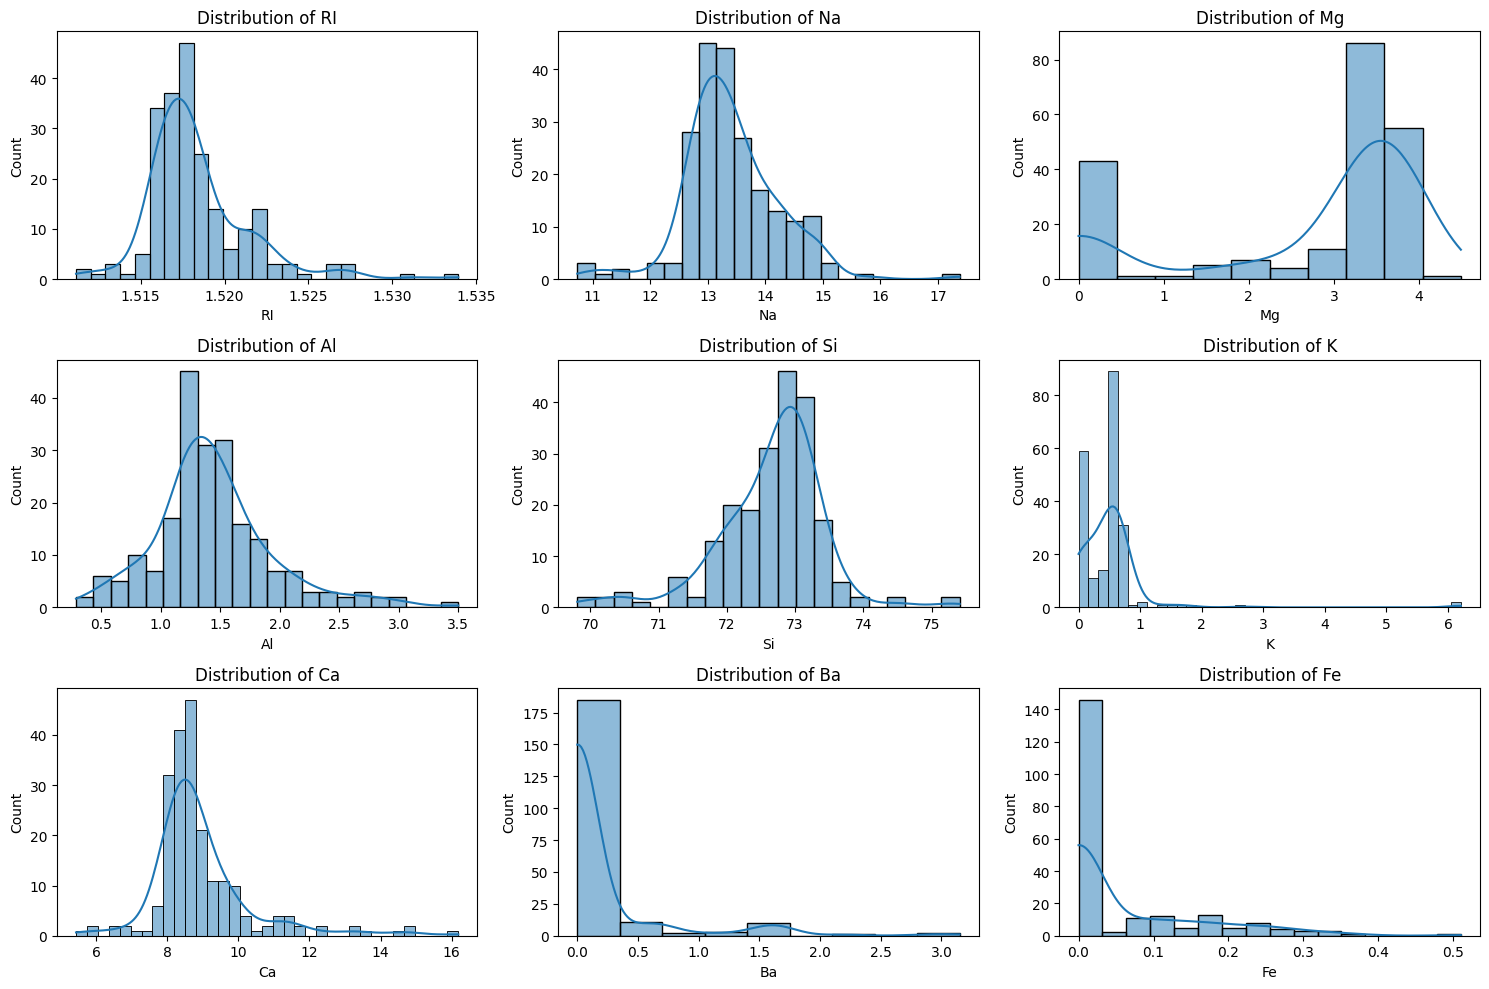

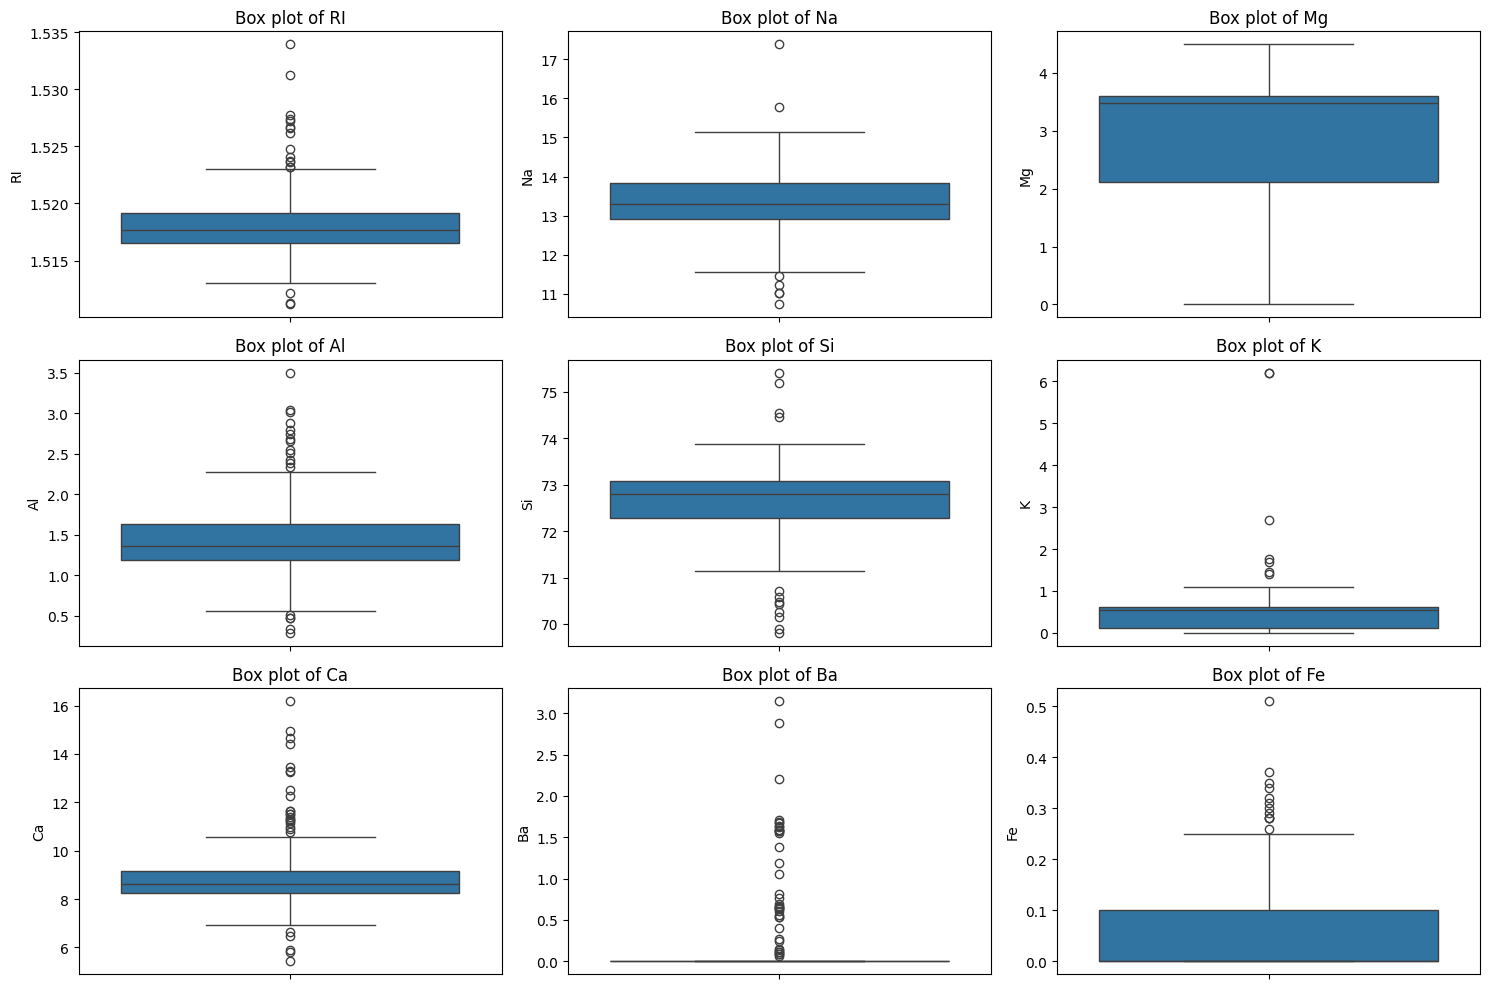

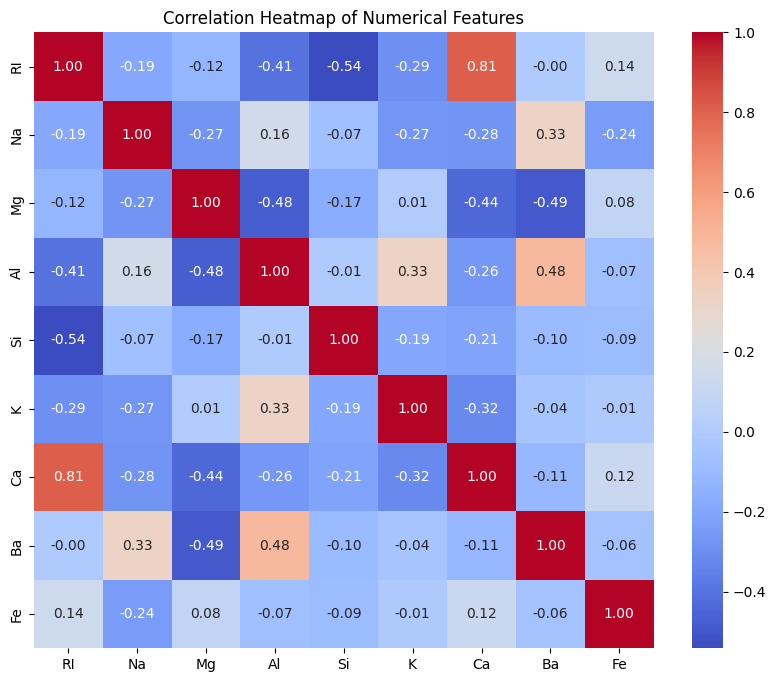

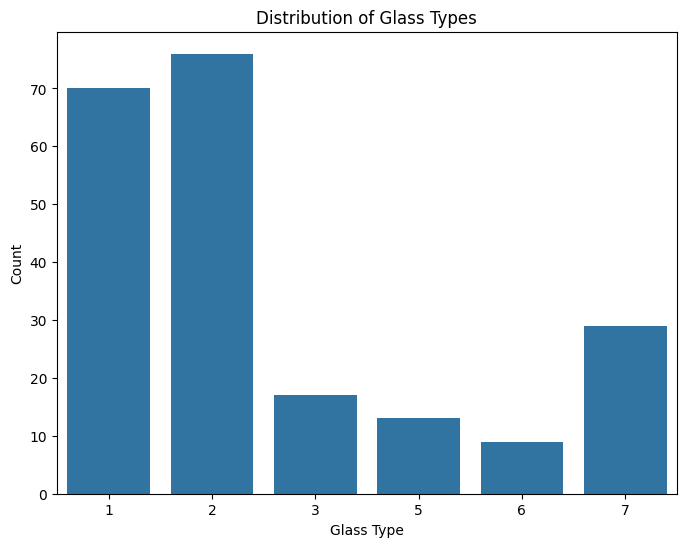

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('Type') # Exclude the target variable from histograms and box plots

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Generate box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Generate count plot for the 'Type' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

## Data preprocessing

### Subtask:
Handle missing values, encode categorical variables, and apply feature scaling. Also, address data imbalance if necessary.


**Reasoning**:
Based on the previous EDA, there are no missing values and all features except the target variable are numerical. Therefore, I will separate features and the target, apply feature scaling, and then address data imbalance using SMOTE.



In [7]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df.drop('Type', axis=1)
y = df['Type']

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame for SMOTE

# Address data imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

display("Original dataset shape:", X.shape, y.shape)
display("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)
display("Value counts of original target:", y.value_counts())
display("Value counts of resampled target:", y_resampled.value_counts())

'Original dataset shape:'

(214, 9)

(214,)

'Resampled dataset shape:'

(456, 9)

(456,)

'Value counts of original target:'

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


'Value counts of resampled target:'

,count
Type,
1,76
2,76
3,76
5,76
6,76
7,76


## Explain bagging and boosting

### Subtask:
Provide an explanation of Bagging and Boosting methods and their differences.


**Reasoning**:
Explain the concepts of Bagging and Boosting, including how they work and their purpose in ensemble learning, and describe their key differences.



In [8]:
print("Bagging (Bootstrap Aggregating):")
print("Bagging is an ensemble learning technique that aims to improve the stability and accuracy of machine learning algorithms, especially in classification and regression. It reduces variance and helps to avoid overfitting.")
print("\nHow it works:")
print("1. Bootstrapping: It involves creating multiple subsets of the original training data by random sampling with replacement. Each subset has the same size as the original dataset, but some samples may be repeated while others may be left out.")
print("2. Base Learners: A base learning algorithm (e.g., decision tree, support vector machine) is trained independently on each of these bootstrapped subsets.")
print("3. Aggregation: For classification tasks, the final prediction is typically made by taking a majority vote of the predictions from all base learners. For regression tasks, the predictions are averaged.")
print("\nPurpose:")
print("Bagging primarily focuses on reducing variance in models that are prone to overfitting, such as deep decision trees. By training multiple models on slightly different datasets and averaging their predictions, the impact of individual noisy data points or model instability is reduced.")

print("\nBoosting:")
print("Boosting is another ensemble learning technique that combines multiple weak learners (models that perform slightly better than random chance) to create a strong learner. It focuses on reducing bias and variance.")
print("\nHow it works:")
print("1. Sequential Learning: Boosting builds models sequentially. Each new model is trained to correct the errors made by the previous models.")
print("2. Weighted Data: Initially, all training data points are given equal weight. After training a model, the weights of misclassified data points are increased, making them more important for the next model.")
print("3. Weighted Voting: The final prediction is a weighted sum of the predictions from all base learners, where the weights are assigned based on the accuracy of each learner.")
print("\nPurpose:")
print("Boosting aims to improve the accuracy of the model by iteratively focusing on the data points that are difficult to classify. It is effective in reducing bias and can often achieve high accuracy, but it can also be sensitive to noisy data and outliers.")

print("\nKey Differences between Bagging and Boosting:")
print("\nApproach to Model Building:")
print("- Bagging: Models are built in parallel and independently of each other.")
print("- Boosting: Models are built sequentially, with each new model learning from the errors of the previous ones.")
print("\nHandling Errors:")
print("- Bagging: Each model is trained on a different subset of data, reducing the impact of errors on the overall prediction.")
print("- Boosting: Focuses on correcting errors by giving more weight to misclassified data points in subsequent iterations.")
print("\nType of Base Learners:")
print("- Bagging: Often uses complex models (e.g., deep decision trees) that are prone to overfitting.")
print("- Boosting: Typically uses simple models (e.g., shallow decision trees or decision stumps) as weak learners.")
print("\nImpact on Variance and Bias:")
print("- Bagging: Primarily reduces variance.")
print("- Boosting: Primarily reduces bias, but can also reduce variance.")

Bagging (Bootstrap Aggregating):
Bagging is an ensemble learning technique that aims to improve the stability and accuracy of machine learning algorithms, especially in classification and regression. It reduces variance and helps to avoid overfitting.

How it works:
1. Bootstrapping: It involves creating multiple subsets of the original training data by random sampling with replacement. Each subset has the same size as the original dataset, but some samples may be repeated while others may be left out.
2. Base Learners: A base learning algorithm (e.g., decision tree, support vector machine) is trained independently on each of these bootstrapped subsets.
3. Aggregation: For classification tasks, the final prediction is typically made by taking a majority vote of the predictions from all base learners. For regression tasks, the predictions are averaged.

Purpose:
Bagging primarily focuses on reducing variance in models that are prone to overfitting, such as deep decision trees. By traini

## Implement random forest

### Subtask:
Split the data into training and testing sets, implement and train the Random Forest classifier, and evaluate its performance.


**Reasoning**:
Split the resampled data, train the Random Forest classifier, make predictions, and evaluate the model performance using accuracy, classification report, and confusion matrix.



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_rep_rf)
print("\nRandom Forest Confusion Matrix:")
print(confusion_mat_rf)

Random Forest Accuracy: 0.9239

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92


Random Forest Confusion Matrix:
[[13  2  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]


## Apply bagging and boosting

### Subtask:
Apply Bagging and Boosting methods to the dataset and evaluate their performance.


**Reasoning**:
Apply Bagging and Boosting methods to the dataset and evaluate their performance.



In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate and train a Bagging classifier
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bagging_classifier.fit(X_train, y_train)

# Predict and evaluate Bagging performance
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
classification_rep_bagging = classification_report(y_test, y_pred_bagging)

print(f"Bagging Accuracy: {accuracy_bagging:.4f}")
print("\nBagging Classification Report:")
print(classification_rep_bagging)

# Instantiate and train an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Predict and evaluate AdaBoost performance
y_pred_adaboost = adaboost_classifier.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y_test, y_pred_adaboost)

print(f"AdaBoost Accuracy: {accuracy_adaboost:.4f}")
print("\nAdaBoost Classification Report:")
print(classification_rep_adaboost)

Bagging Accuracy: 0.9022

Bagging Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.76      0.79        17
           2       0.89      0.84      0.86        19
           3       0.67      0.80      0.73        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.90        92
   macro avg       0.89      0.90      0.90        92
weighted avg       0.91      0.90      0.90        92

AdaBoost Accuracy: 0.5435

AdaBoost Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.82      0.50        17
           2       0.07      0.05      0.06        19
           3       0.60      0.30      0.40        10
           5       0.00      0.00      0.00        14
           6       1.00      1.00      1.00        14
           7    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Compare results

### Subtask:
Compare the results obtained from Random Forest, Bagging, and Boosting models.


**Reasoning**:
Print the accuracy scores of the three models and then discuss and compare their performance.



In [12]:
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Bagging Accuracy: {accuracy_bagging:.4f}")
print(f"AdaBoost Accuracy: {accuracy_adaboost:.4f}")

print("\n--- Model Performance Comparison ---")
print(f"Random Forest performed best with an accuracy of {accuracy_rf:.4f}.")
print(f"Bagging performed well with an accuracy of {accuracy_bagging:.4f}.")
print(f"AdaBoost performed the worst with an accuracy of {accuracy_adaboost:.4f}.")

print("\n--- Analysis of Classification Reports (Based on previously printed reports) ---")
print("Random Forest and Bagging show relatively good performance across most classes, indicated by higher precision, recall, and f1-scores in their respective classification reports.")
print("AdaBoost's classification report shows significantly lower precision, recall, and f1-scores for many classes, indicating poor performance in classifying those specific glass types.")

print("\n--- Summary of Performance Differences and Potential Reasons ---")
print("Random Forest and Bagging, both being parallel ensemble methods, tend to reduce variance and are less sensitive to individual noisy data points. This likely contributes to their better performance on this dataset, especially given the potential for outliers observed during EDA.")
print("AdaBoost, being a sequential method that focuses on misclassified samples, appears to struggle with this dataset. This could be due to its sensitivity to noise and outliers, or perhaps the simple base estimator (Decision Tree with max_depth=1) was not sufficient to capture the underlying patterns effectively.")
print("The class imbalance, although addressed with SMOTE, might still pose a challenge for AdaBoost compared to the more robust Random Forest and Bagging methods.")

Random Forest Accuracy: 0.9239
Bagging Accuracy: 0.9022
AdaBoost Accuracy: 0.5435

--- Model Performance Comparison ---
Random Forest performed best with an accuracy of 0.9239.
Bagging performed well with an accuracy of 0.9022.
AdaBoost performed the worst with an accuracy of 0.5435.

--- Analysis of Classification Reports (Based on previously printed reports) ---
Random Forest and Bagging show relatively good performance across most classes, indicated by higher precision, recall, and f1-scores in their respective classification reports.
AdaBoost's classification report shows significantly lower precision, recall, and f1-scores for many classes, indicating poor performance in classifying those specific glass types.

--- Summary of Performance Differences and Potential Reasons ---
Random Forest and Bagging, both being parallel ensemble methods, tend to reduce variance and are less sensitive to individual noisy data points. This likely contributes to their better performance on this data

## Summary:

### Data Analysis Key Findings

*   The glass dataset was successfully loaded from the 'glass' sheet of the Excel file.
*   No missing values were found in the dataset.
*   Descriptive statistics and box plots indicated the potential presence of outliers in several features.
*   The 'Type' column exhibited class imbalance, with some glass types having significantly fewer instances than others.
*   The dataset consists only of numerical features and a numerical target variable ('Type').
*   Feature scaling was applied using `StandardScaler` to standardize the numerical features.
*   SMOTE was used to address the class imbalance by oversampling the minority classes, resulting in a balanced dataset with 456 samples.
*   Explanations of Bagging and Boosting, highlighting their methods (bootstrapping vs. sequential learning) and primary focus (variance reduction vs. bias reduction), were provided.
*   Random Forest, Bagging, and AdaBoost classifiers were trained and evaluated on the resampled data.
*   Random Forest achieved the highest accuracy (0.9239).
*   Bagging achieved a good accuracy (0.9022), slightly lower than Random Forest.
*   AdaBoost achieved a significantly lower accuracy (0.5435) compared to Random Forest and Bagging.
*   The analysis suggests that Random Forest and Bagging are more robust to potential noise and outliers in this dataset than AdaBoost, possibly due to their parallel ensemble nature.

### Insights or Next Steps

*   Further investigation into the potential outliers identified during EDA could be beneficial. Techniques like outlier removal or robust scaling might improve model performance.
*   Hyperparameter tuning for each model (Random Forest, Bagging, and AdaBoost) could potentially improve their performance. For AdaBoost, experimenting with different base estimators or increasing the number of estimators might be necessary to improve its accuracy on this dataset.
